<a href="https://colab.research.google.com/github/Vlasovets/Deep_learning_course_assistantship/blob/master/Building_fullly_connected_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced topics in User Interfaces

## 🧐 **Learning goals** 
The tutorial covers the topics explained during the lecture in the following parts:
1.   to continue with sequence classification with RNNs
2.   to get introduced with a simple autoencoder based on a fully-connected neural layer
3.   to train and test models on the Fashion-MNIST dataset
4.   to work with different parameters of the model

Fully-connected layers. We connect each item example to one neuron.


## 🔑1. Introduction

### What are autoencoders?🤔

"Autoencoding" is a data compression algorithm where the compression and decompression functions are:
* <font color=lightgreen>Data-specific</font>

Autoencoders will only be able to compress data similar to what they have been trained on. For instance, an autoencoder trained on pictures of faces would do a rather poor job of compressing pictures of trees, because the features it would learn would be face-specific.
* <font color=lightblue>Lossy</font>

The decompressed outputs will be degraded compared to the original inputs (similar to MP3 or JPEG compression). This differs from lossless arithmetic compression.

* <font color=lightpink>Learned automatically from examples rather than engineered by a human</font>

It is easy to train specialized instances of the algorithm that will perform well on a specific type of input. It doesn't require any new engineering, just appropriate training data.

In [1]:
from IPython.display import Image
Image(url='https://blog.keras.io/img/ae/autoencoder_schema.jpg')

### 🔨 How to build autoencoders?
To build an autoencoder, you need three things:

1) <font color=gold>encoding function</font>

2) <font color=pink>decoding function</font> 

3) <font color=lightblue>loss function</font>

In this exercise, the encoding and decoding functions are neural networks. Nevertheless, they can be any parametric functions are differentiable with respect to the distance function, so the parameters of the encoding/decoding functions can be optimized to minimize the reconstruction loss, using, for instance, [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

In [2]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np #import numpy

Imported necessary libraries to start the most exciting part.💣

## 2. 👠 Fashion-MNIST dataset

We have already met [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. Some researches believe that it is too easy and overused. 

So, here Fashion-MNIST is a dataset of [Zalando’s](https://research.zalando.com/) article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28×28 grayscale image, associated with a label from 10 classes.

In [3]:
from IPython.display import Image
Image(url='https://s3-eu-central-1.amazonaws.com/zalando-wp-zalando-research-production/2017/08/fashion-mnist-sprite.png')

Import and spit the data.

❗️ *Note*: in this exercise fully connected neural layers are used, so we need to specify only width and height for each of the images.

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# normalize our data.
X_train, X_test = X_train / 255.0, X_test / 255.0

In [0]:
# Split train partition again, so that we can use a subset for validation.
num_val_imgs = 0.1 * len(X_train)
num_val_imgs = int(num_val_imgs) 

X_train, X_valid = X_train[:-num_val_imgs], X_train[-num_val_imgs:]
y_train, y_valid = y_train[:-num_val_imgs], y_train[-num_val_imgs:]

In [0]:
#Specify width and height.
IMG_SHAPE = (28, 28)

## ⚡ 3. Model Training

### Encoder 🔒 


In [8]:
# Create encoder network.
encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=IMG_SHAPE),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### Decoder 🔓

In [0]:
# Create decoder network.
decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=encoder.output_shape),
    tf.keras.layers.Dense(IMG_SHAPE[0] * IMG_SHAPE[1], activation='sigmoid'),
    tf.keras.layers.Reshape(IMG_SHAPE),
])

Here, we use [ReLU](https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7) and [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation functions, but you are more than <font color=pink>welcome to propose your own  activation function</font> to make a final prediction better since there are many ways for improvement😉.

In [11]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/720/1*n1HFBpwv21FCAzGjmWt1sg.png')

### 🚀 Compile and train the model

Define a custom metric to monitor reconstruction accuracy, since MSE is not human-friendly. 

Let's call it "reconstruction accuracy", or "rec_acc" for short.

In [0]:
def rec_acc(y_true, y_pred):
    return tf.keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [13]:
# Create autoencoder model, compile it, and train it.
autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 50)                83550     
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28)            84284     
Total params: 167,834
Trainable params: 167,834
Non-trainable params: 0
_________________________________________________________________


Since our pixel values are defined in the [0,1] range, we could use <font color=lightgreen>binary_crossentropy</font> as loss function, however, let's use [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) to make the model more general.

In [21]:
autoencoder.compile(loss='mse', optimizer='adam', metrics=['mse', rec_acc])
autoencoder.fit(X_train, X_train, epochs=2, validation_data=[X_valid, X_valid])

Train on 43200 samples, validate on 4800 samples
Epoch 1/2
43200/43200 [==============================] - 7s 153us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - rec_acc: 0.9034 - val_loss: 0.0169 - val_mean_squared_error: 0.0169 - val_rec_acc: 0.9280
Epoch 2/2
43200/43200 [==============================] - 6s 137us/sample - loss: 0.0155 - mean_squared_error: 0.0155 - rec_acc: 0.9319 - val_loss: 0.0141 - val_mean_squared_error: 0.0141 - val_rec_acc: 0.9350


You can see that after 2 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.01.

Let's see an overview of our network architectures.

In [22]:
encoder.summary()
decoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
Total params: 83,550
Trainable params: 83,550
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              multiple                  5100      
_________________________________________________________________
dense_3 (Dense)              multiple                  79184     
______________________________

How different these models are ❔

Can you say now which one will show better results ❔

Why ❔

💾 Finally, save the models.

In [0]:
autoencoder.save('fashion_mnist-autoencoder.h5')
encoder.save('fashion_mnist-encoder.h5')
decoder.save('fashion_mnist-decoder.h5')

## 💎 4. Model testing

Since we work with images, it is very simple to check how good our model is. 

Let's pick a random item from the data we have.

In [0]:
# This function selects one item at random from a list.
def randselect(arr, num=1):
    num_samples = arr.shape[0]
    rand_index = np.random.choice(num_samples, num, replace=False)
    return arr[rand_index]

In [0]:
def show_reconstructions(model, images, num_images=10):
    samples = images[:num_images]
    # Better: select `num_images` at random.
    samples = randselect(images, num_images)
    reconstructions = model.predict(samples)
    # Allocate output fig size, in inches.
    fig = plt.figure(figsize=(num_images, num_images//3))
    for i in range(num_images):
        img_src = samples[i]
        img_rec = reconstructions[i]
        # Plot original images in the top row.
        plt.subplot(2, num_images, 1 + i)
        plt.axis('off')
        plt.imshow(img_src, cmap='binary')
        # Plot reconstructed images in the bottom row.
        plt.subplot(2, num_images, 1 + num_images + i)
        plt.axis('off')
        plt.imshow(img_rec, cmap='binary')
    fig.show()

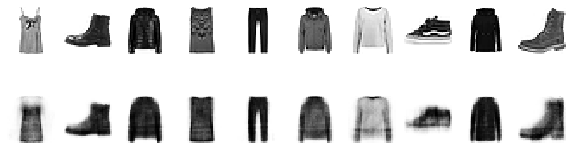

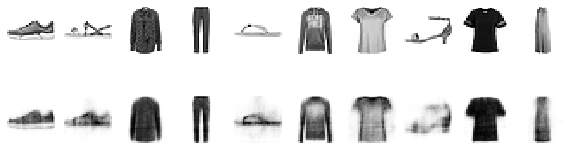

In [29]:
show_reconstructions(autoencoder, X_valid)
show_reconstructions(autoencoder, X_test)

As you can see the first image is more clear when the second one obtained from the test data looks blurry.

### 🎁 5. Bonus Exercises

There are many ways to visualize the results of your model in Python, and for 2D visualization specifically.

[t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) is an algorithm which usually shows good results, but it typically requires relatively low-dimensional data. So a good strategy for visualizing similarity relationships in high-dimensional data is to start by using an autoencoder to compress the data into a low-dimensional space (e.g. 32 dimensional), then use t-SNE for mapping the compressed data to a 2D plane.

#### Bonus 1: 
Plot the learned compressed representation.

Since we have labels in this dataset, we can use them as color cues.

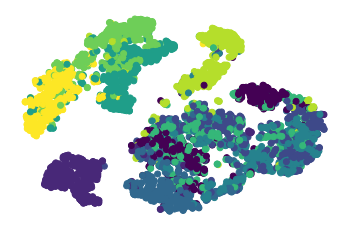

In [30]:
from sklearn.manifold import TSNE

recs = autoencoder.predict(X_valid)
tsne = TSNE() # project to 2 dims by default

# All `fit()` methods in scikit-learn expects 2D arrays, so flatten reconstructed data.
s = recs.shape # (num_samples, width, height)
new_shape = (s[0], np.prod(s[1:])) # (num_samples, width * height)
flat = recs.reshape(new_shape)
comp = tsne.fit_transform(flat)
# Normalize data bounds so that they fit in a [0,1] square plot.
comp = (comp - comp.min()) / (comp.max() - comp.min())

plt.scatter(comp[:, 0], comp[:, 1], c=y_valid)
plt.axis('off')
plt.show()

####  Bonus 2: 

Plot a representative image of each learned group.

Since we have labels in this dataset, we can use them as color cues.

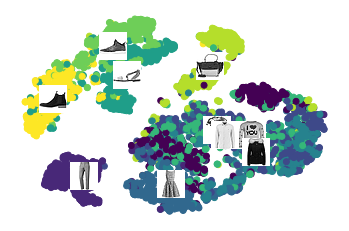

In [31]:
def centroid(arr):
    N, dims = arr.shape
    return np.array([np.sum(arr[:, i])/N for i in range(dims)])

plt.scatter(comp[:, 0], comp[:, 1], c=y_valid)
for label in list(set(y_valid)):
    # Gather all samples with current label.
    indices = np.where(y_valid == label)
    samples_orig = np.take(X_valid, indices[0], axis=0)
    samples_comp = np.take(comp, indices[0], axis=0)
    # Compute centroid of projected samples.
    center = centroid(samples_comp)
    # Display a representative image (at random) near each centroid.
    # NB: `np.random.choice()` always returns a list, even if we request only one result.
    sample = randselect(samples_orig)[0]
    imgbox = mpl.offsetbox.OffsetImage(sample, cmap='binary')
    imgpic = mpl.offsetbox.AnnotationBbox(imgbox, center, frameon=False)
    plt.gca().add_artist(imgpic)

plt.axis('off')
plt.show()

To sum up, as you can see we have clusters of different items grouped by the category. 

For instance, we see an 'island' of different types of shoes 🥾 in the left top corner and 'archipelago' of different types of dresses 👗 in the right bottom corner. 

## 🏁 6. Conclusion

Now, you know:

1.   one more RNN image classification model
2.   autoencoders and advantages of this type of model
3.   how to use Fashion-MNIST dataset for your projects
4.   how to work with different parameters of the model
5.   how to flatten the data and visualize model results

Do not hesitate to ask questions at otorrent@mail.ru

Thank you for your attention and see you next exercise session!